In [1]:
## Load data

In [50]:
import pickle
import pandas 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("poster", font_scale=1.1) ## poster format
sns.set_style("ticks")

# pickle.load( open( "C:\\Users\\David\\Desktop\\IDIBAPS\\Melanie_data\\df_corrected_Sa2.pickle", "rb" ) )

with open("C:\\Users\\David\\Desktop\\IDIBAPS\\Melanie_data\\df_corrected_Sa2.pickle", 'rb') as handle:
    df_dat = pickle.load(handle)

In [51]:
df_dat.head()

,trial_id,sp_train,outcome,targ_xy,targ_angle,saccade_xy,saccade_angle,monkey,session,start,fix,targ_on,targ_off,go_cue,saccade,reward,trial_end
0,1,"(19, 0)\t1.0\n (45, 0)\t1.0\n (39, 1)\t1.0...",CORRECT,"[-157.05952052691873, 65.05618350206528]",67.5,"[-152.25114256858143, 67.7215398151819]",66.020429,Sa,2,1.0,259.0,472.0,892.0,3311.0,3491.0,3601.0,4380
1,2,"(43, 2)\t1.0\n (73, 2)\t1.0\n (121, 2)\t1....",CORRECT,"[125.64761642153499, 52.04494680165221]",292.5,"[125.82535896669323, 31.59868168533787]",284.097231,Sa,2,1.0,166.0,381.0,801.0,3221.0,3463.0,3572.0,4350
2,3,"(7, 0)\t1.0\n (26, 0)\t1.0\n (4, 1)\t1.0\n...",CORRECT,"[-104.08989360330435, -251.29523284307]",157.5,"[-84.57275017420879, -272.3301424858054]",162.747699,Sa,2,1.0,74.0,291.0,711.0,2731.0,2916.0,3030.0,3809
3,4,"(2, 0)\t1.0\n (30, 0)\t1.0\n (69, 1)\t1.0\...",CORRECT,"[-125.647616421535, -52.044946801652195]",112.5,"[-153.00128219844342, -106.29518449569761]",124.789020,Sa,2,1.0,74.0,292.0,711.0,2931.0,3107.0,3212.0,3990
4,5,"(41, 0)\t1.0\n (45, 0)\t1.0\n (39, 3)\t1.0...",CORRECT,"[-91.0786569028913, -219.88332873768627]",157.5,"[-80.74894038718212, -216.7699324910585]",159.569141,Sa,2,1.0,74.0,291.0,711.0,2931.0,3109.0,3225.0,3999


In [122]:
np.shape(df_dat)
## 2407 trials

(2407, 17)

In [92]:
df_dat.iloc[100]

trial_id                                                       101
sp_train           (16, 0)\t1.0\n  (38, 0)\t1.0\n  (34, 1)\t1.0...
outcome                                                  BROKE_FIX
targ_xy                    [157.05952052691873, 65.05618350206527]
targ_angle                                                   292.5
saccade_xy                                                      []
saccade_angle                                                  NaN
monkey                                                          Sa
session                                                          2
start                                                            1
fix                                                             75
targ_on                                                        292
targ_off                                                       712
go_cue                                                        1862
saccade                                                       

In [54]:
np.array(df_dat['sp_train'].iloc[0].todense())

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [123]:
np.shape(df_dat['sp_train'].iloc[0].todense())
# (neurons, time)

(139, 4380)

In [97]:
df_dat['fix'].iloc[trial_number]

73.0

In [ ]:
fix                                                             75
targ_on                                                        292
targ_off                                                       712
go_cue                                                        1862
saccade                                                       1862
reward                                                        1862

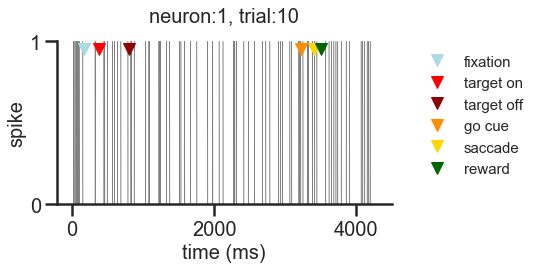

In [166]:
neuron_number=1
trial_number=10
plt.figure(figsize=(6,3))

n_x = np.array(df_dat['sp_train'].iloc[trial_number].todense())[neuron_number,:]
plt.plot(np.arange(1, len(n_x)+1,1), n_x, color='grey', linewidth=0.5)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='out') #direction
plt.ylabel('spike', fontsize=20)
plt.xlabel('time (ms)', fontsize=20)
plt.ylim(0,1)
plt.yticks([0,1]);
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.plot(df_dat['fix'].iloc[trial_number], 0.95, marker='v', linewidth=0, color='lightblue', label='fixation')
plt.plot(df_dat['targ_on'].iloc[trial_number], 0.95, marker='v', linewidth=0, color='red', label='target on')
plt.plot(df_dat['targ_off'].iloc[trial_number], 0.95, marker='v', linewidth=0, color='darkred', label='target off')
plt.plot(df_dat['go_cue'].iloc[trial_number], 0.95, marker='v', linewidth=0, color='darkorange', label='go cue')
plt.plot(df_dat['saccade'].iloc[trial_number], 0.95, marker='v', linewidth=0, color='gold', label='saccade')
plt.plot(df_dat['reward'].iloc[trial_number], 0.95, marker='v', linewidth=0, color='darkgreen', label='reward')

plt.legend(frameon=False, bbox_to_anchor=(1.05, 1), fontsize=15)
plt.title('neuron:' + str(neuron_number) + ', trial:' +str(trial_number), fontsize=20, pad=20);


In [167]:
df_dat.iloc[trial_number]

trial_id                                                        11
sp_train           (51, 0)\t1.0\n  (53, 0)\t1.0\n  (126, 0)\t1....
outcome                                                    CORRECT
targ_xy                    [-52.0449468016522, 125.64761642153499]
targ_angle                                                    22.5
saccade_xy               [-38.519763886994795, 116.97300257066304]
saccade_angle                                               18.227
monkey                                                          Sa
session                                                          2
start                                                            1
fix                                                            163
targ_on                                                        383
targ_off                                                       803
go_cue                                                        3223
saccade                                                       

In [160]:
df_dat['saccade'].iloc[trial_number]

3531.0

In [161]:
df_dat['reward'].iloc[trial_number]

3318.0

In [158]:
radius = []
radius_mod=[]

for i in range(len(df_dat)):
    x, y = df_dat.iloc[i].targ_xy
    mod =  int(np.sqrt((x**2 + y**2))) 
    if mod==136:
        radius.append('r1')
        radius_mod.append(136)
    elif (mod==169) or (mod==170) :
        radius.append('r2')
        radius_mod.append(170)
    elif mod==204:
        radius.append('r3')
        radius_mod.append(204)
    elif (mod==237) or (mod==238):
        radius.append('r4')
        radius_mod.append(238)
    elif mod==272:
        radius.append('r5')
        radius_mod.append(270)
####
df_dat['radius'] = radius
## distance between radius is constant (34)
df_dat['radius_mod'] = radius_mod



In [159]:
lens_ = [len(df_dat.loc[df_dat['radius']==r]) for r in ['r1', 'r2', 'r3', 'r4', 'r5']]
lens_

[517, 511, 300, 570, 509]

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


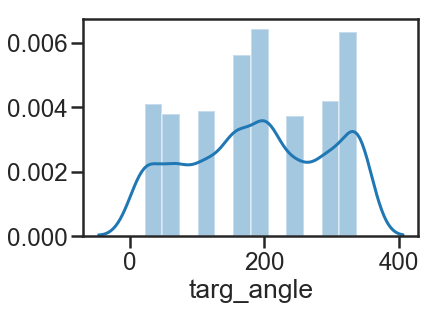

In [169]:
sns.distplot(df_dat.targ_angle)

In [170]:
df_dat.targ_angle.unique()
## 8 possible angle locations

array([ 67.5, 292.5, 157.5, 112.5, 247.5, 202.5, 337.5,  22.5])

In [3]:
## Count spikes in a certain windows 
#   https://neuronaldynamics.epfl.ch/online/Ch7.S2.html#:~:text=The%20firing%20rate%20in%20trial,k%3DnspkT.&text=The%20length%20T%20of%20the,occur%20within%20the%20time%20window.

![](fr_IMG.PNG)

In [ ]:
## Select the neurons with angular tuning

df = pd.DataFrame({"Y": fr_cue, "P1": M[:,0], "P2": M[:,1], "P3": M[:,2], "P4": M[:,3], "P5": M[:,4], "P6": M[:,5], "P7": M[:,6], "P8": M[:,7]})
#result = smf.ols(formula="Y ~ 0+ P1+ P2 + P3 + P4 + P5 + P6 + P7 + P8 ", data=df).fit()
result = smf.ols(formula="Y ~ P2 + P3 + P4 + P5 + P6 + P7 + P8 ", data=df).fit()
p_vals=[result.pvalues[j] for j in range(1,cues+1)] #I do not take the intercept



In [ ]:
## From those neurons with angular tuning, make the tuning curve in each radius (get the cos_fits)

### circular variance: 
### first you calculate the population vector
### then you appply the formula

def get_pref(cue_activity):
    #with this formula I take one vector from 0 for each position, where the module is the strength of the signal and the imaginary part the angle
    #after doing that I sum all of them to know the prefered one, this one is the angle, the v would be the module
    v=sum([exp(1j*c/8.0*2*pi)*(float(cue_activity[c])/sum(cue_activity)) for c in range(8)])
    angle=convert_2pi(phase(v))
    return (angle,abs(v))


s=amap(lambda x: sqrt(-2*np.log(x)),cos_fits) #std circular (this is the reason for the )
## np.save('std_circ_rad.npy', s) ### add later, but worked fine!
Y=concatenate(s)







In [ ]:
### make the plots

clean_idx = ~isnan(Y)
X=concatenate([ones(len(x))*i for i,x in enumerate(cos_fits)])
df = pd.DataFrame({"std_circular": Y, "eccentricity": X})
model = smf.ols(formula="std_circular ~  eccentricity", data=df).fit()
print(model.summary())

subplot(2,1,1)
errorbar(range(3),amap(nanmean,cos_fits),amap(nanstd,cos_fits)/sqrt(amap(len,cos_fits)),color="black")
xticks([0,1,2], ['ring1', 'ring2', 'ring3'])
title("Tuning strength")

subplot(2,1,2)
errorbar(range(3),amap(nanmean,s),amap(nanstd,s)/sqrt(amap(len,s)),color="red")
xticks([0,1,2], ['ring1', 'ring2', 'ring3'])

xlabel("rings")
title("Circular standard deviation")
tight_layout()
sns.despine()